In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [78]:
# Load the dataset
df = pd.read_csv(r'C:\Users\WINDOWS\Downloads\archive\mobile phone price prediction.csv')
print(df.head())

   Unnamed: 0                                  Name  Rating  Spec_score  \
0           0                 Samsung Galaxy F14 5G    4.65          68   
1           1                    Samsung Galaxy A11    4.20          63   
2           2                    Samsung Galaxy A13    4.30          75   
3           3                    Samsung Galaxy F23    4.10          73   
4           4  Samsung Galaxy A03s (4GB RAM + 64GB)    4.10          69   

                       No_of_sim       Ram            Battery     Display  \
0  Dual Sim, 3G, 4G, 5G, VoLTE,   4 GB RAM  6000 mAh Battery   6.6 inches   
1      Dual Sim, 3G, 4G, VoLTE,   2 GB RAM  4000 mAh Battery   6.4 inches   
2      Dual Sim, 3G, 4G, VoLTE,   4 GB RAM  5000 mAh Battery   6.6 inches   
3      Dual Sim, 3G, 4G, VoLTE,   4 GB RAM   6000 mAh Battery  6.4 inches   
4      Dual Sim, 3G, 4G, VoLTE,   4 GB RAM  5000 mAh Battery   6.5 inches   

                                              Camera  \
0    50 MP + 2 MP Dual Rear &a

In [79]:
selected_features = ['Rating','Spec_score','Ram','Battery']
target_variable ='Price'

In [80]:
# Clean 'Ram', 'Battery' and 'Price' columns
df['Ram'] = df['Ram'].str.extract('(\d+.\d+|\d+)').astype(float)
df['Battery'] = df['Battery'].str.extract('(\d+.\d+|\d+)').astype(float)
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df.head()

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4.0,6000.0,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,9999.0,Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2.0,4000.0,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,9990.0,Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4.0,5000.0,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,11999.0,Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4.0,6000.0,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,11999.0,Samsung,64 GB inbuilt,NaN,720 x 1600 px,Octa Core,Helio G88
4,4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4.0,5000.0,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",11,11999.0,Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


In [81]:
# Split the data into training and testing sets
X = df[selected_features]
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [82]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [83]:
# Make predictions on the test set
y_pred = model.predict(X_test)
# Optionally, you can create a DataFrame to compare actual vs.predicted prices
predictions_df = pd.DataFrame({'Actual_Price': y_test,
'Predicted_Price': y_pred})
print(predictions_df.head()) # Display the first few predictions forcomparison

      Actual_Price  Predicted_Price
427        28999.0     40139.979827
1088       30999.0     41827.462241
668        72999.0     40210.047695
572        27990.0     43091.336030
115        11990.0      4554.718922


In [84]:
# Calculate Mean Squared Error and R-Squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 520384623.8553369
R^2 Score: 0.42278305223005486


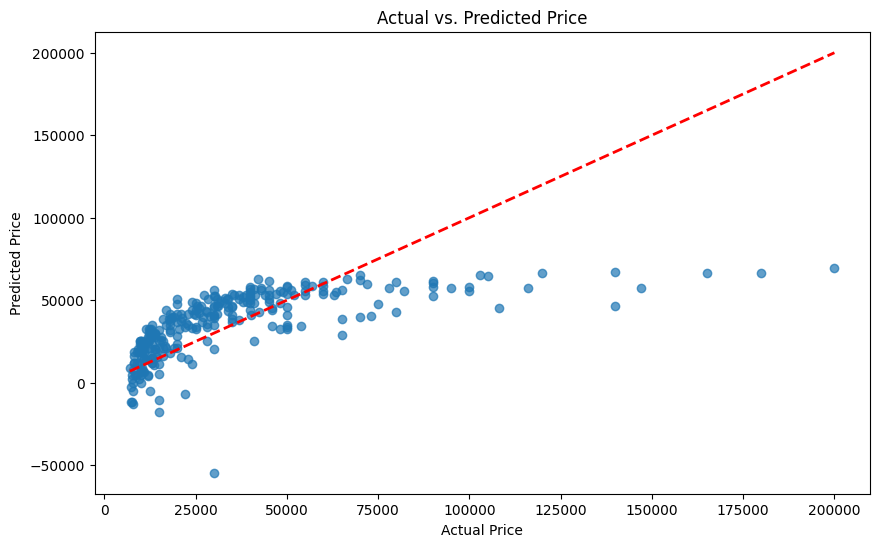

In [85]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price')
plt.show()


In [86]:
# Example new data (features of a new smartphone)
new_phone_features = pd.DataFrame({
'Rating': [4.5],
'Spec_score': [70],
'Ram': [6],
'Battery': [5000]
})
# Predict price for the new data using the trained model
predicted_price = model.predict(new_phone_features)
print(f'Predicted Price for the New Smartphone:${predicted_price[0]:,.2f}')


Predicted Price for the New Smartphone:$9,018.02
